# 环境

In [1]:
import sys
print(sys.version)

3.7.6 (default, Jan  8 2020, 20:23:39) [MSC v.1916 64 bit (AMD64)]


In [17]:
# EMD-signal
import PyEMD    
print(PyEMD.__version__)
print(PyEMD.__file__)

0.2.10
d:\anaconda\envs\kari\lib\site-packages\PyEMD\__init__.py


In [15]:
import ewtpy
print(ewtpy.__version__)


AttributeError: module 'ewtpy' has no attribute '__version__'

In [5]:
import pkg_resources
print(pkg_resources.get_distribution("ewtpy").version)

0.2


In [7]:
import tensorflow
print(tensorflow.__version__)

2.10.0


# **Load Data**

In [1]:
# import pandas as pd
# df = pd.read_csv('./dataset/data_CO2.csv')
# df

,date,co2
0,2019-01-01,32.267221
1,2019-01-02,31.713352
2,2019-01-03,30.632988
3,2019-01-04,31.433309
4,2019-01-05,31.437860
...,...,...
1942,2024-04-26,28.845392
1943,2024-04-27,28.874172
1944,2024-04-28,28.721022
1945,2024-04-29,29.371420


In [17]:
# from importlib import reload
# import myfunctions
# reload(myfunctions)  # 重新加载模块
# from myfunctions import createXy, get_train_val_test

# # (1)将一维时间序列转换为监督学习格式；(2)划分
# # (1)
# series = df.iloc[:, 1].values  # 从df中提取数值列，形成一维数组。# 形状 (1947,)
# X, y = createXy(series, look_back=3)
# print("数据集形状:", X.shape, y.shape)  #(1944, 3) (1944, 1)
# # (2)
# X_train, X_val, X_test, y_train, y_val, y_test = get_train_val_test(X, y)
# print("训练集形状:", X_train.shape, y_train.shape)  #(1360, 3) (1360, 1)
# print("验证集形状:", X_val.shape, y_val.shape)      #(388, 3) (388, 1)
# print("测试集形状:", X_test.shape, y_test.shape)    #(196, 3) (196, 1)


数据集形状: (1944, 3) (1944, 1)
训练集形状: (1360, 3) (1360, 1)
验证集形状: (388, 3) (388, 1)
测试集形状: (196, 3) (196, 1)


# **Model**


## **ceemdan_ewt_lstm**

In [1]:
import pandas as pd
df = pd.read_csv('./dataset/data_CO2.csv')

from importlib import reload
import myfunctions
reload(myfunctions)  # 重新加载模块

from myfunctions import ceemdan_ewt_lstm
true,pred=ceemdan_ewt_lstm(df,look_back=6)

MAPE:0.598
RMSE:0.242
MAE:0.186
r2:0.985


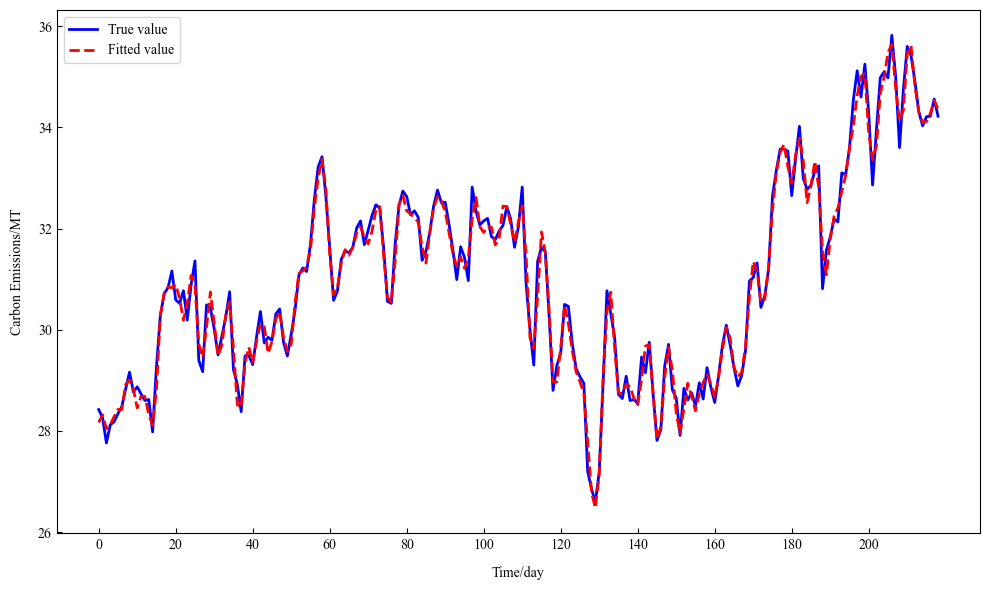

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
#将上面两行代码放在你导入相关库（如pandas、matplotlib等）之后，绘制图形之前。这样就可以显式地注册转换器，避免未来版本出现问题。

# plt.rcParams['font.sans-serif'] = ['SimHei']  #指定字体为黑体
plt.rcParams['font.family'] = 'serif'          # 指定字体族为衬线字体
plt.rcParams['font.serif'] = ['Times New Roman']  # 具体的衬线字体为 Times New Roman
plt.rcParams['axes.unicode_minus'] = False  #用来正常显示负号

# 创建一个图形和坐标轴对象
fig, ax = plt.subplots(figsize=(10,6),tight_layout=True)

x = np.arange(len(true))
ax.plot(x, true, label='True value', linestyle='-', color='blue', linewidth=2)
ax.plot(x, pred, label='Fitted value', linestyle='--', color='red', linewidth=2)

ax.set_xlabel('Time/day', fontsize=10,  labelpad=10)
ax.set_ylabel('Carbon Emissions/MT', fontsize=10,  labelpad=10)

# 设置纵坐标范围
y_min = min(min(true), min(pred)) - 0.5  # 稍微低于最小值
y_max = max(max(true), max(pred)) + 0.5  # 稍微高于最大值
ax.set_ylim(y_min, y_max)
# 设置横坐标刻度间隔
ax.set_xticks(np.arange(0, len(x), 20))

ax.legend()
ax.tick_params(direction='in')
# plt.savefig('./figures/proposed_pre_en.png')
plt.savefig('./figures/proposed_pre_en.tif', format='tiff', dpi=300, pil_kwargs={'compression': 'tiff_lzw'})

## **lstm**

In [6]:
import pandas as pd
df = pd.read_csv('./dataset/data_CO2.csv')

from importlib import reload
import myfunctions
reload(myfunctions)  # 重新加载模块

from myfunctions import lstm_model
true,pred=lstm_model(df,look_back=6)

MAPE:1.644
RMSE:0.670
MAE:0.507
r2:0.888


## **svr**

In [4]:
import pandas as pd
df = pd.read_csv('./dataset/data_CO2.csv')

from importlib import reload
import myfunctions
reload(myfunctions)  # 重新加载模块

from myfunctions import svr_model
true,pred=svr_model(df,look_back=6)

MAPE:1.683
RMSE:0.687
MAE:0.521
r2:0.882


## **ann**

In [3]:
import pandas as pd
df = pd.read_csv('./dataset/data_CO2.csv')

from importlib import reload
import myfunctions
reload(myfunctions)  # 重新加载模块

from myfunctions import ann_model
true,pred=ann_model(df,look_back=6)

MAPE:1.702
RMSE:0.691
MAE:0.528
r2:0.880


## **rf**

In [5]:
import pandas as pd
df = pd.read_csv('./dataset/data_CO2.csv')

from importlib import reload
import myfunctions
reload(myfunctions)  # 重新加载模块

from myfunctions import rf_model
true,pred=rf_model(df,look_back=6)

MAPE:1.680
RMSE:0.679
MAE:0.522
r2:0.884


## **emd_lstm**

In [7]:
import pandas as pd
df = pd.read_csv('./dataset/data_CO2.csv')

from importlib import reload
import myfunctions
reload(myfunctions)  # 重新加载模块

from myfunctions import emd_lstm
true,pred=emd_lstm(df,look_back=6)

MAPE:1.043
RMSE:0.423
MAE:0.320
r2:0.955


## **eemd_lstm**

In [8]:
import pandas as pd
df = pd.read_csv('./dataset/data_CO2.csv')

from importlib import reload
import myfunctions
reload(myfunctions)  # 重新加载模块

from myfunctions import eemd_lstm
true,pred=eemd_lstm(df,look_back=6)

MAPE:1.064
RMSE:0.417
MAE:0.329
r2:0.956


## **ceemdan_lstm**

In [9]:
import pandas as pd
df = pd.read_csv('./dataset/data_CO2.csv')

from importlib import reload
import myfunctions
reload(myfunctions)  # 重新加载模块

from myfunctions import ceemdan_lstm
true,pred=ceemdan_lstm(df,look_back=6)

MAPE:0.774
RMSE:0.308
MAE:0.239
r2:0.976
